### EDA of the Database CoCoLoFa

CoCoLoFa was created using the techniques proposed in the following paper. Please cite this work if you use CoCoLoFa.

@misc{yeh2024cocolofadatasetnewscomments,
      title={CoCoLoFa: A Dataset of News Comments with Common Logical Fallacies Written by LLM-Assisted Crowds}, 
      author={Min-Hsuan Yeh and Ruyuan Wan and Ting-Hao 'Kenneth' Huang},
      year={2024},
      eprint={2410.03457},
      archivePrefix={arXiv},
      primaryClass={cs.CL},
      url={https://arxiv.org/abs/2410.03457}, 
}

In [1]:
import json
import pandas as pd
import os

In [2]:
# Load 3_CoCoLoFa_train_EDA.json into Python
file_path = '../data/3_CoCoLoFa_train_EDA.json' 
with open(file_path, 'r') as file:
    train_data = json.load(file)

# Load test data
with open('../data/3_CoCoLoFa_test_EDA.json', 'r') as file:
    test_data = json.load(file)

# Load dev data
with open('../data/3_CoCoLoFa_dev_EDA.json', 'r') as file:
    dev_data = json.load(file)

In [3]:
data = train_data + test_data + dev_data

In [4]:
# Initialize a list to store comment data
comments_data = []

# Iterate through each article in the JSON data
for article in data:
    # Extract comments from each article
    for comment in article['comments']:
        comment_info = {
            'id': comment['id'],
            'news_id': comment['news_id'],
            'worker_id': comment['worker_id'],
            'respond_to': comment['respond_to'],
            'fallacy': comment['fallacy'],
            'comment': comment['comment']
        }
        comments_data.append(comment_info)


In [5]:
# Create a DataFrame from the extracted comment data
df_comments = pd.DataFrame(comments_data)

### Check if comments have different fallacies

In [6]:
# Group by the 'comment' column and aggregate unique fallacy labels
fallacy_analysis = (
    df_comments.groupby('comment')['fallacy']
    .apply(lambda x: list(x.unique()))  # Get unique fallacy labels per comment
    .reset_index()
)

In [7]:
# Add a column to count how many unique fallacy labels exist per comment
fallacy_analysis['num_fallacies'] = fallacy_analysis['fallacy'].apply(len)

In [8]:
# Filter for comments that have more than one unique fallacy label
comments_with_multiple_fallacies = fallacy_analysis[fallacy_analysis['num_fallacies'] > 1]

In [9]:
# Display the results
print("Comments with multiple fallacy labels:")
print(comments_with_multiple_fallacies)

Comments with multiple fallacy labels:
Empty DataFrame
Columns: [comment, fallacy, num_fallacies]
Index: []


### Look for duplicates and drop

In [10]:
exact_duplicates = df_comments[df_comments.duplicated()]
print(f"Number of exact duplicates: {len(exact_duplicates)}")

Number of exact duplicates: 5370


In [11]:
df_comments.comment.duplicated().sum()

5373

In [12]:
# Drop duplicate rows based on the 'id' column
df_comments = df_comments.drop_duplicates()


In [13]:
df_comments.reset_index(inplace=True)

### Save CSV

In [14]:
df_comments.to_csv('../data/3_CoCoLoFa_merged.csv', index=False)

### Some EDA

In [15]:
df_comments.head()

,index,id,news_id,worker_id,respond_to,fallacy,comment
0,0,5584,262,1,,none,Lack of transparency in government isn't unexp...
1,1,5582,262,2,,appeal to authority,While the issues discussed here should be addr...
2,2,5583,262,3,,none,The excuse that Brazilian municipalities do no...
3,3,6183,262,4,,none,This is what's to be expected of developing an...
4,4,6182,262,2,5584,appeal to tradition,"Sad to say, I have to agree with you. Rulers c..."


In [16]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       6908 non-null   int64 
 1   id          6908 non-null   object
 2   news_id     6908 non-null   int64 
 3   worker_id   6908 non-null   int64 
 4   respond_to  6908 non-null   object
 5   fallacy     6908 non-null   object
 6   comment     6908 non-null   object
dtypes: int64(3), object(4)
memory usage: 377.9+ KB


In [17]:
df_comments['fallacy'].unique()

array(['none', 'appeal to authority', 'appeal to tradition',
       'appeal to worse problems', 'hasty generalization',
       'slippery slope', 'false dilemma', 'appeal to majority',
       'appeal to nature'], dtype=object)

In [18]:
df_comments['fallacy'].nunique()

9

In [19]:
fallacy_counts = df_comments.groupby('fallacy')['comment'].count().sort_values(ascending=False)

print("Fallacy counts:")
print(fallacy_counts)

print(f"\nTotal number of unique fallacies: {len(fallacy_counts)}")

Fallacy counts:
fallacy
none                        2813
slippery slope               572
appeal to nature             538
appeal to worse problems     531
appeal to tradition          515
false dilemma                504
hasty generalization         497
appeal to majority           492
appeal to authority          446
Name: comment, dtype: int64

Total number of unique fallacies: 9


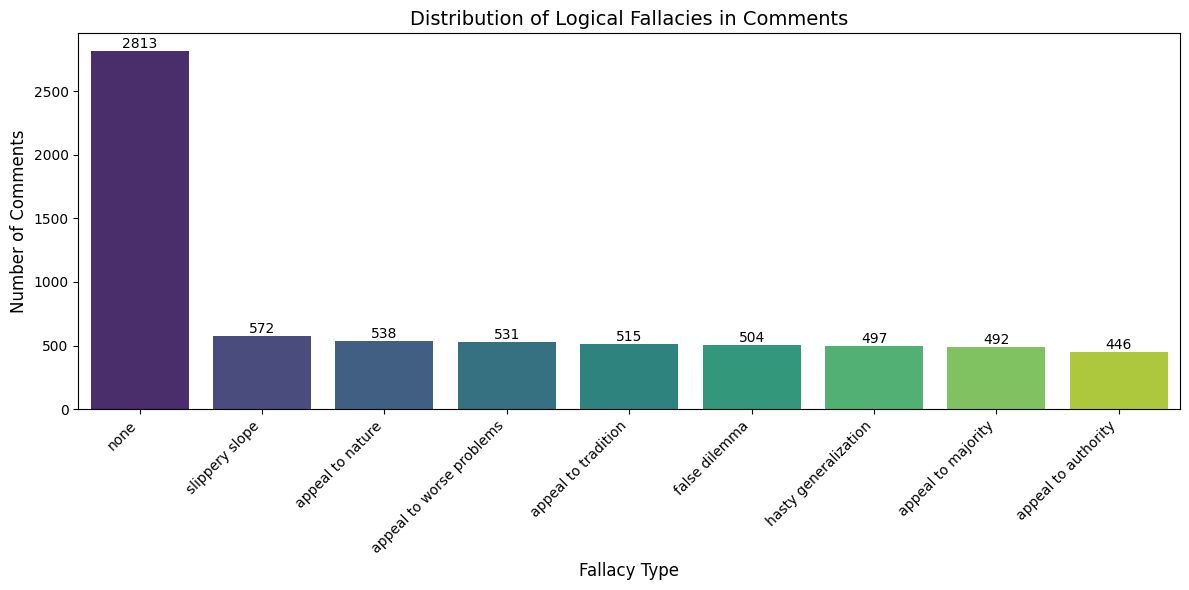

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure
plt.figure(figsize=(12, 6))
sns.barplot(x=fallacy_counts.index, y=fallacy_counts.values, palette="viridis")

# Customize plot
plt.title("Distribution of Logical Fallacies in Comments", fontsize=14)
plt.xlabel("Fallacy Type", fontsize=12)
plt.ylabel("Number of Comments", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on bars
for i, value in enumerate(fallacy_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.show()
